In [66]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('Student_Maths.csv')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [29]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [30]:
df.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

In [32]:
df.drop(['Dalc', 'Walc'], inplace=True, axis=1)

In [40]:
df[['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']] = df[['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian','failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']]. apply(lambda x: x. astype('category'))

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      395 non-null    category
 1   sex         395 non-null    category
 2   age         395 non-null    int64   
 3   address     395 non-null    category
 4   famsize     395 non-null    category
 5   Pstatus     395 non-null    category
 6   Medu        395 non-null    category
 7   Fedu        395 non-null    category
 8   Mjob        395 non-null    category
 9   Fjob        395 non-null    category
 10  reason      395 non-null    category
 11  guardian    395 non-null    category
 12  traveltime  395 non-null    int64   
 13  studytime   395 non-null    int64   
 14  failures    395 non-null    category
 15  schoolsup   395 non-null    category
 16  famsup      395 non-null    category
 17  paid        395 non-null    category
 18  activities  395 non-null    category
 19  nursery 

<AxesSubplot:>

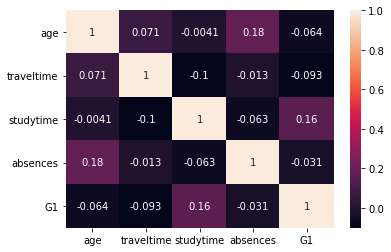

In [52]:
h =df.iloc[:,0:29].corr()
sns.heatmap(h, annot=True)

In [49]:
df.drop('G2', axis=1, inplace=True) 

In [60]:
dummy_df = pd.get_dummies( df.iloc[:,:-1], drop_first=True)
dummy_df.head()

,age,traveltime,studytime,absences,G1,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,...,freetime_4,freetime_5,goout_2,goout_3,goout_4,goout_5,health_2,health_3,health_4,health_5
0,18,2,2,6,5,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,17,1,2,4,5,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
2,15,1,2,10,7,0,0,1,1,1,...,0,0,1,0,0,0,0,1,0,0
3,15,1,3,2,15,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
4,16,1,2,4,6,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1


In [61]:
df_X =dummy_df.iloc[:,:-1]
df_Y = dummy_df.iloc[:,-1]

In [62]:
train_x_with_constant=sm.add_constant((df_X))

In [63]:
model = sm.OLS(df_Y, train_x_with_constant).fit()

In [64]:

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               health_5   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     13.20
Date:                Sun, 29 Aug 2021   Prob (F-statistic):           1.48e-57
Time:                        13:19:16   Log-Likelihood:                -41.020
No. Observations:                 395   AIC:                             198.0
Df Residuals:                     337   BIC:                             428.8
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4707      0.45

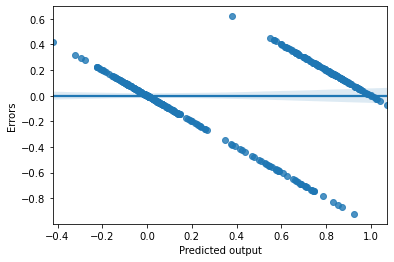

In [67]:
plt.figure()
sns.regplot(y = model.resid, x = model.fittedvalues);   # residual plot
plt.xlabel('Predicted output')
plt.ylabel('Errors');